In [1]:
import pandas as pd


columnas = [
    "mpg",              # consumo de combustible (millas por galón)
    "cylinders",        # número de cilindros
    "displacement",     # desplazamiento del motor
    "horsepower",       # caballos de fuerza
    "weight",           # peso del vehículo
    "acceleration",     # aceleración (0 a 60 mph en segundos)
    "model_year",       # año del modelo
    "origin",           # origen (1=EEUU, 2=Europa, 3=Asia)
    "car_name"          # nombre del auto
]

data = pd.read_csv("auto-mpg.data", sep=r"\s+", names=columnas, na_values="?")

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# EDA

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [3]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [4]:
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [5]:
data.shape

(398, 9)

In [6]:
data['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

# PREPROCESAMIENTO

In [7]:
data['car_name'].value_counts()

car_name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [8]:
data = data.drop(columns=['car_name'])

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

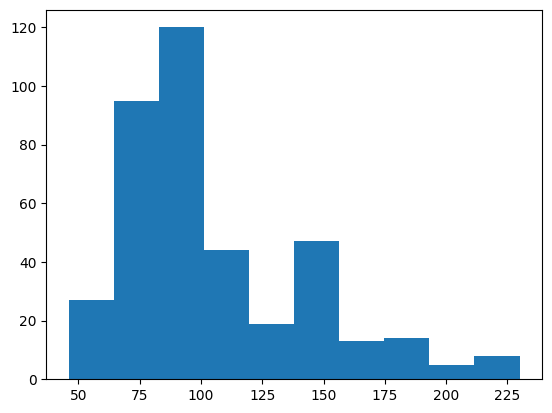

In [9]:
import matplotlib.pyplot as plt

plt.hist(data['horsepower'])

In [10]:
data['horsepower'].mean()

104.46938775510205

In [11]:
data['horsepower'].median()

93.5

In [12]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

(array([ 27.,  95., 126.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

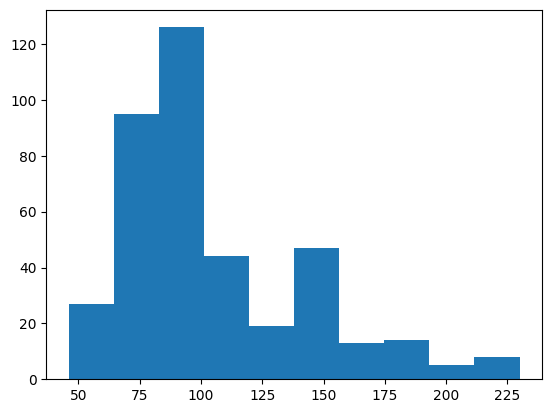

In [13]:
plt.hist(data['horsepower'])

# ALGORITMOS

In [14]:
# SEPARAR VARIABLES

X = data.drop('origin', axis=1)
y = data['origin']

In [15]:
X

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

In [17]:
# DIVISION DE LOS DATOS

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# ESCALADO

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
# PREDICCIONES

y_pred_clf = knn_clf.predict(X_test_scaled)
y_pred_clf

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 3, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2,
       1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [24]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           1       0.85      0.87      0.86        53
           2       0.67      0.57      0.62        14
           3       0.43      0.46      0.44        13

    accuracy                           0.75        80
   macro avg       0.65      0.63      0.64        80
weighted avg       0.75      0.75      0.75        80



Text(50.722222222222214, 0.5, 'Valor real')

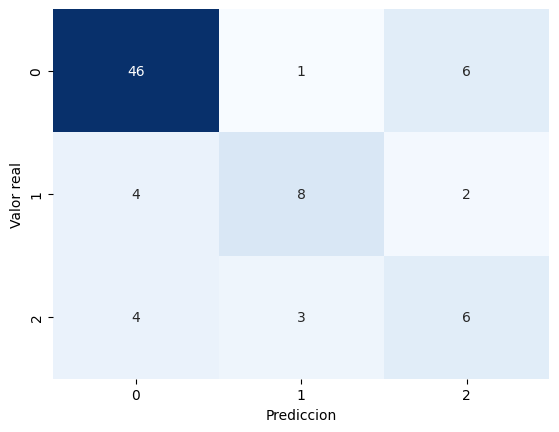

In [30]:
cm = confusion_matrix(y_test, y_pred_clf)

sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Prediccion')
plt.ylabel('Valor real')

# KNN GridsearchCV

In [31]:
from sklearn.model_selection import GridSearchCV

In [34]:
knn_clf_grid = KNeighborsClassifier()

params_knn_clf = {
    'n_neighbors': [2,5,7,10,15,20,25,35,40],
    'weights': ['uniform', 'distance'],
    'p': [1,2,3]
}

grid_knn_clf = GridSearchCV(
    knn_clf_grid,
    params_knn_clf,
    cv=5,
    scoring='accuracy'
)

grid_knn_clf.fit(X_train_scaled, y_train)

print("Mejores parametros: ", grid_knn_clf.best_params_)
print("Accuracy: ", grid_knn_clf.best_score_)

Mejores parametros:  {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Accuracy:  0.7639384920634921


# SVM

In [36]:
from sklearn.svm import SVC

In [38]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [39]:
y_pred_svc = svc.predict(X_test_scaled)
y_pred_svc

array([3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1,
       1, 3, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 2,
       1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1], dtype=int64)

Text(50.722222222222214, 0.5, 'Valor real')

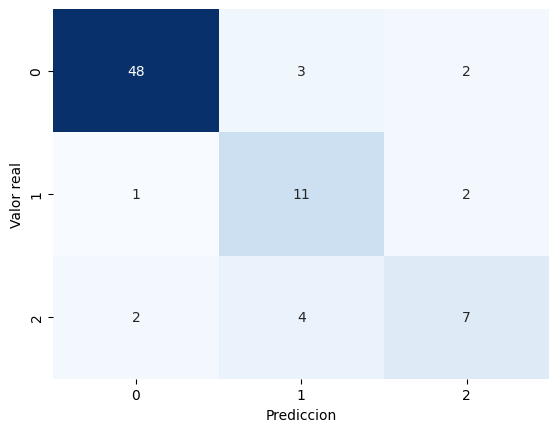

In [40]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

sns.heatmap(cm_svc, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Prediccion')
plt.ylabel('Valor real')

In [41]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.94      0.91      0.92        53
           2       0.61      0.79      0.69        14
           3       0.64      0.54      0.58        13

    accuracy                           0.82        80
   macro avg       0.73      0.74      0.73        80
weighted avg       0.83      0.82      0.83        80



In [43]:
svc_grid = SVC()

params_svc = {
    'C': [0.1, 1, 5, 10, 50, 100],              # control de regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # distintos tipos de kernel
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],   # relevante para RBF, poly y sigmoid
    'degree': [2, 3, 4],                        # sólo aplica para kernel 'poly'
    'coef0': [0.0, 0.1, 0.5]                    # parámetro adicional para poly y sigmoid
}

grid_svc = GridSearchCV(
    svc_grid,
    params_svc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_svc.fit(X_train_scaled, y_train)
print("Mejores parámetros:", grid_svc.best_params_)
print("Mejor accuracy:", grid_svc.best_score_)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Mejores parámetros: {'C': 50, 'coef0': 0.5, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Mejor accuracy: 0.7987599206349205


# RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

params_rf = {
    'n_estimators': [100, 200, 300, 500],        # número de árboles
    'max_depth': [None, 5, 10, 15, 20],          # profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],             # mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],               # mínimo de muestras por hoja
    'max_features': ['sqrt', 'log2'],            # número de features a considerar por división
    'bootstrap': [True, False]                   # si usar muestreo con reemplazo
}

grid_rf = GridSearchCV(
    rf_clf,
    params_rf,
    cv=5,                   # validación cruzada de 5 pliegues
    scoring='accuracy',     # métrica de evaluación
    n_jobs=-1,              # usar todos los núcleos del CPU
    verbose=1
)

grid_rf.fit(X_train_scaled, y_train)

print("Mejores parámetros:", grid_rf.best_params_)
print("Accuracy:", grid_rf.best_score_)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Mejores parámetros: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8520337301587302


In [46]:
y_pred_rf = grid_rf.predict(X_test_scaled)
y_pred_rf

array([3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1,
       1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 2, 2, 1,
       3, 1, 2, 2, 3, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1], dtype=int64)

Text(50.722222222222214, 0.5, 'Valor real')

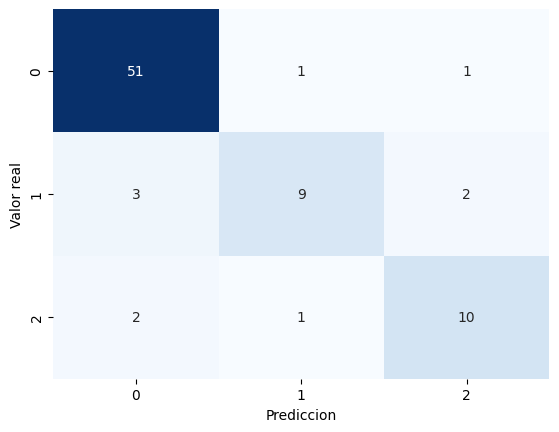

In [47]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Prediccion')
plt.ylabel('Valor real')

In [48]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.91      0.96      0.94        53
           2       0.82      0.64      0.72        14
           3       0.77      0.77      0.77        13

    accuracy                           0.88        80
   macro avg       0.83      0.79      0.81        80
weighted avg       0.87      0.88      0.87        80



# GUARDAR EL MEJOR MODELO

In [49]:
import joblib

best_rf = grid_rf.best_estimator_

joblib.dump(best_rf, "random_forest_model.pkl")

['random_forest_model.pkl']

In [50]:
import joblib
import numpy as np

modelo = joblib.load("random_forest_model.pkl")

print("Ingresa los valores del nuevo vehículo:\n")

mpg = float(input("mpg (rendimiento en millas por galón): "))
cylinders = int(input("cylinders (número de cilindros): "))
displacement = float(input("displacement (cilindrada del motor): "))
horsepower = float(input("horsepower (caballos de fuerza): "))
weight = float(input("weight (peso del vehículo en libras): "))
acceleration = float(input("acceleration (aceleración 0–60 mph en segundos): "))
model_year = int(input("model_year (año del modelo, ej. 70): "))

nuevo_auto = np.array([[mpg, cylinders, displacement, horsepower, weight, acceleration, model_year]])

prediccion = modelo.predict(nuevo_auto)[0]

print("\n🔮 Predicción del modelo Random Forest:")
print(f"El origen predicho del auto es: {prediccion}")

Ingresa los valores del nuevo vehículo:



mpg (rendimiento en millas por galón):  40
cylinders (número de cilindros):  3
displacement (cilindrada del motor):  300
horsepower (caballos de fuerza):  80
weight (peso del vehículo en libras):  2000
acceleration (aceleración 0–60 mph en segundos):  60
model_year (año del modelo, ej. 70):  80



🔮 Predicción del modelo Random Forest:
El origen predicho del auto es: 1
